<a href="https://colab.research.google.com/github/ifeeney/On-Device-DL/blob/main/Train_gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Label Keys


0. Doing other things
1. Drumming Fingers
2. No Gesture
3. Pulling Hand In
4. Pulling Two Fingers In
5. Pushing Hand Away
6. Pushing Two Fingers Away
7. Rolling Hand Backward
8. Rolling Hand Forward
9. Shaking Hand
10. Sliding Two Fingers Down
11. Sliding Two Fingers Left
12. Sliding Two Fingers Up
13. Sliding Two Fingers Up
14. Stop Sign
15. Swiping Down
16. Swiping Left
17. Swiping Right
18. Swiping Up
19. Thumb Down
20. Thumb Up
21. Turning Hand Clockwaise
22. Turning Hand Counterclockwise
23. Zoomig In With Full Hand
24. Zooming In With Two Fingers
25. Zooming Out With Full Hand
26. Zooming Out With Two Fingers

In [ ]:
import tensorflow as tf
import keras
from keras import layers

# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('bellas_model.h5')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 37, 128)           98304     
                                                                 
 lstm_1 (LSTM)               (None, 37, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 27)                891       
                                                                 
Total params: 286427 (1.09 MB)
Trainable params: 286427 

In [ ]:
import numpy as np

def load():
    loadedArr = np.loadtxt("processed_sequence.csv")
    loadedArr2 = np.loadtxt("processed_labels.csv")
    # This loadedArr is a 2D array, therefore we need to convert it to the original array shape.
    # reshaping to get original matrice with original shape.
    loadedOriginal = loadedArr.reshape(loadedArr.shape[0], loadedArr.shape[1] // 63, 63)
    return loadedOriginal, loadedArr2

X_train, y_train = load()
print("shape of sequence:", X_train.shape)
print("shape of y labels:", y_train.shape)

shape of sequence: (10000, 37, 63)
shape of y labels: (10000, 27)


In [ ]:
import numpy as np

def load_val():
    loadedArr = np.loadtxt("processed__val_sequence.csv")
    loadedArr2 = np.loadtxt("processed__val_labels.csv")
    # This loadedArr is a 2D array, therefore we need to convert it to the original array shape.
    # reshaping to get original matrice with original shape.
    loadedOriginal = loadedArr.reshape(loadedArr.shape[0], loadedArr.shape[1] // 63, 63)
    return loadedOriginal, loadedArr2

X_test, y_test = load_val()
print("shape of sequence:", X_test.shape)
print("shape of y labels:", y_test.shape)

shape of sequence: (7040, 37, 63)
shape of y labels: (7040, 27)


In [ ]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(37,63)))
    model.add(keras.layers.LSTM(128, return_sequences=True, activation='relu'))
    model.add(keras.layers.LSTM(64, return_sequences=False, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(27, activation='softmax'))
    model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

#model = create_model()
#model = keras.models.load_model('best_model')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint], batch_size=32, epochs=10)

# Save the entire model to a HDF5 file
model.save('bellas_model2.h5')

Epoch 1/10
313/313 [==============================] - 78s 236ms/step - loss: 2.8139 - categorical_accuracy: 0.1487 - val_loss: 2.3197 - val_categorical_accuracy: 0.2472
Epoch 2/10
313/313 [==============================] - 77s 245ms/step - loss: 2.0712 - categorical_accuracy: 0.3217 - val_loss: 1.9338 - val_categorical_accuracy: 0.3886
Epoch 3/10
313/313 [==============================] - 66s 212ms/step - loss: 1.7561 - categorical_accuracy: 0.4323 - val_loss: 10.8074 - val_categorical_accuracy: 0.4226
Epoch 4/10
313/313 [==============================] - 73s 233ms/step - loss: 1.6919 - categorical_accuracy: 0.4768 - val_loss: 2.1065 - val_categorical_accuracy: 0.4869
Epoch 5/10
313/313 [==============================] - 72s 230ms/step - loss: 1.5436 - categorical_accuracy: 0.5240 - val_loss: 1.4730 - val_categorical_accuracy: 0.5366
Epoch 6/10
313/313 [==============================] - 62s 199ms/step - loss: 1.3490 - categorical_accuracy: 0.5671 - val_loss: 1.4383 - val_categorical_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


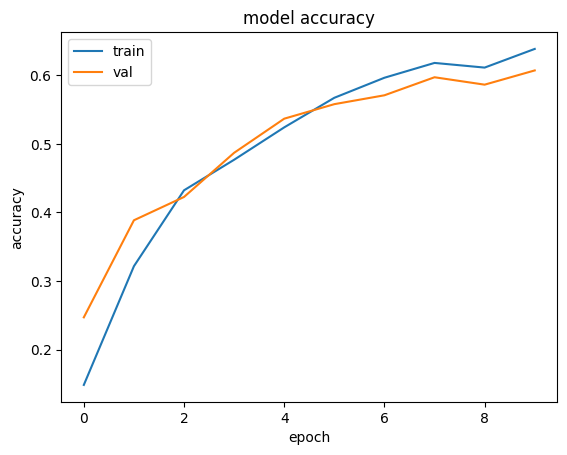

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

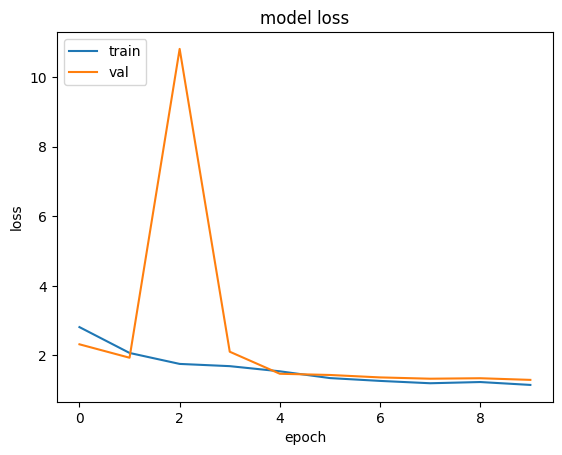

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
220/220 [==============================] - 14s 63ms/step - loss: 1.2972 - categorical_accuracy: 0.6070
test loss, test acc: [1.2971904277801514, 0.6069602370262146]


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:10])
print("predictions shape:", predictions.shape)
print(tf.argmax(predictions, axis=-1))
print(tf.argmax((y_test[:10]), axis=-1))

Generate predictions for 3 samples
1/1 [==============================] - 1s 1s/step
predictions shape: (10, 27)
tf.Tensor([ 2  5 25 19 17 16  1 19 25 26], shape=(10,), dtype=int64)
tf.Tensor([23 15  9 19 17 25  1 19 25 26], shape=(10,), dtype=int64)


# Convert to tf lite model

In [ ]:
run_model = tf.function(lambda x: model(x))

# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = 37
INPUT_SIZE = 63
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model.inputs[0].dtype))

# model directory.
MODEL_DIR = "keras_lstm"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()

# Save the model.
with open('bellas_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# Run the model with TensorFlow to get expected results.
TEST_CASES = 10

# Run the model with TensorFlow Lite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for i in range(TEST_CASES):
  expected = model.predict(X_test[i:i+1])
  interpreter.set_tensor(input_details[0]["index"], np.float32(X_test[i:i+1, :, :]))
  interpreter.invoke()
  result = interpreter.get_tensor(output_details[0]["index"])

  # Assert if the result of TFLite model is consistent with the TF model.
  np.testing.assert_almost_equal(expected, result, decimal=5)
  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

  # Please note: TfLite fused Lstm kernel is stateful, so we need to reset
  # the states.
  # Clean up internal states.
  interpreter.reset_all_variables()

1/1 [==============================] - 0s 105ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 98ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 142ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 99ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 108ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 94ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 88ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 173ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [===============